In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def rk4(f, y0, t0, tf, h):
    """
    Solves a first-order ordinary differential equation or a system of them
    using the 4th-order Runge-Kutta (RK4) method.

    The ODE is expected to be in the form dy/dt = f(t, y).

    Args:
        f (callable): The function defining the ODE system, f(t, y).
                      It must return an array-like object of the same shape as y.
        y0 (float or array-like): The initial condition(s) for y at time t0.
        t0 (float): The starting time.
        tf (float): The ending time.
        h (float): The step size for the integration.

    Returns:
        tuple: A tuple containing:
            - t_points (numpy.ndarray): Array of time points.
            - y_points (numpy.ndarray): Array of solution values for y at each time point.
                                        If y is a vector, this will be a 2D array
                                        where each row corresponds to a time point.
    """
    # Generate time points
    t_points = np.arange(t0, tf + h, h)
    n_steps = len(t_points)

    # Ensure y0 is a numpy array for consistent operations
    y0 = np.atleast_1d(y0)

    # Initialize array to store the solution
    y_points = np.zeros((n_steps, len(y0)))
    y_points[0] = y0

    # RK4 integration loop
    y = y0
    for i in range(n_steps - 1):
        t = t_points[i]

        k1 = h * f(t, y)
        k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
        k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
        k4 = h * f(t + h, y + k3)

        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6.0
        y_points[i+1] = y

    return t_points, y_points



### Example: Solve y′ = −2y, y(0) = 1, using RK4 with step size h = 0.1 upto x = 1 and plot y vs x.
True Soln: $e^{−2x}$

In [21]:
def f(t,x):
    return -2*x

In [26]:
# rk4
t_points, y_points = rk4(f, 1, 0, 1, 0.1)
# True values
y = np.exp(-2*t_points)


Text(0.5, 1.0, 'y vs x using RK4')

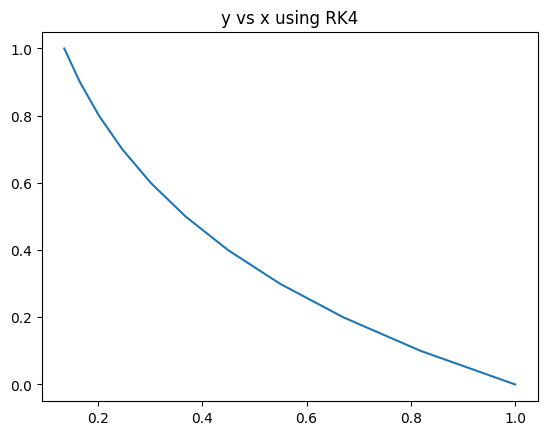

In [29]:
plt.plot(y_points, t_points)
plt.title("y vs x using RK4")

Text(0.5, 1.0, 'y vs x (putting y = e^(-2x))')

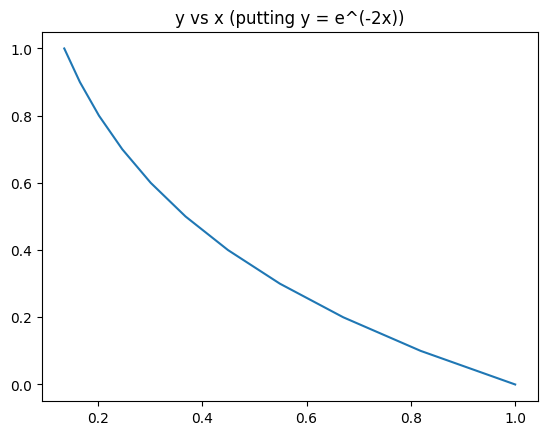

In [30]:
plt.plot(y, t_points)
plt.title("y vs x (putting y = e^(-2x))")

----

In [32]:
def rk4_coupled_oscillator(f, y1_0, y2_0, t0, tf, h):
    """
    Solves a specific system of two coupled first-order ODEs using RK4.
    The system is expected to be in the form:
    y1' = y2
    y2' = f(t, y1, y2)

    This is a specialized version of the general rk4 solver for this common
    structure, often arising from second-order ODEs.

    Args:
        f (callable): The function defining the second derivative, f(t, y1, y2).
        y1_0 (float): The initial condition for y1 at time t0.
        y2_0 (float): The initial condition for y2 at time t0.
        t0 (float): The starting time.
        tf (float): The ending time.
        h (float): The step size for the integration.

    Returns:
        tuple: A tuple containing:
            - t_points (numpy.ndarray): Array of time points.
            - y_points (numpy.ndarray): 2D array of solution values. Column 0 is y1,
                                        column 1 is y2.
    """
    
    t_points = np.arange(t0, tf + h, h)
    n_steps = len(t_points)

    y_points = np.zeros((n_steps, 2))
    y_points[0] = [y1_0, y2_0]

    y1, y2 = y1_0, y2_0

    for i in range(n_steps - 1):
        t = t_points[i]

        # Calculate k and l coefficients for y1 and y2 respectively
        k1 = h * y2
        l1 = h * f(t, y1, y2)

        k2 = h * (y2 + 0.5 * l1)
        l2 = h * f(t + 0.5 * h, y1 + 0.5 * k1, y2 + 0.5 * l1)

        k3 = h * (y2 + 0.5 * l2)
        l3 = h * f(t + 0.5 * h, y1 + 0.5 * k2, y2 + 0.5 * l2)

        k4 = h * (y2 + l3)
        l4 = h * f(t + h, y1 + k3, y2 + l3)

        # Update y1 and y2
        y1 = y1 + (k1 + 2*k2 + 2*k3 + k4) / 6.0
        y2 = y2 + (l1 + 2*l2 + 2*l3 + l4) / 6.0

        y_points[i+1] = [y1, y2]

    return t_points, y_points

## Oscillator cases

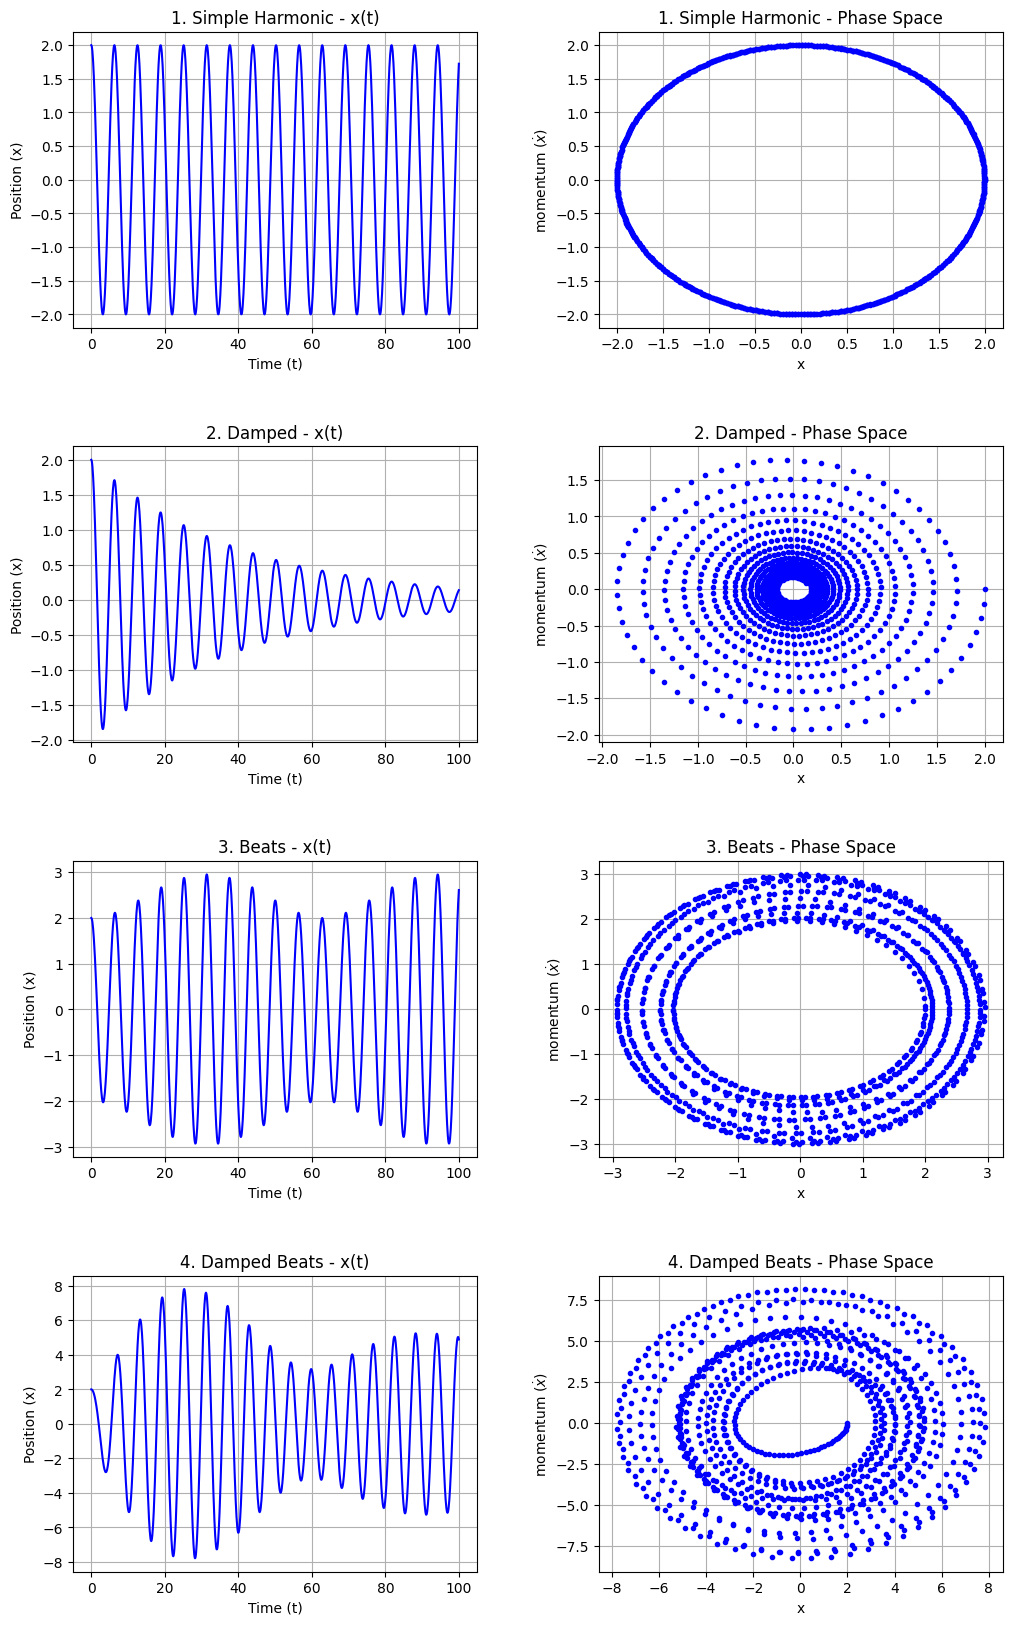

In [ ]:
# --- 2. Physics Definition ---
def create_derivative_func(gamma, F0, omega):
    # Returns the function for acceleration: x'' = F0*cos(wt) - gamma*x' - x
    def f(t, x, v):
        return F0 * np.cos(omega * t) - gamma * v - x
    return f

# The 4 Cases from the prompt
cases = [
    # Case 1: Simple Harmonic (No damping, No drive)
    {"label": "1. Simple Harmonic", "gamma": 0.0,  "F0": 0.0, "omega": 0.0},
    
    # Case 2: Damped (Damping, No drive)
    {"label": "2. Damped",          "gamma": 0.05, "F0": 0.0, "omega": 0.0},
    
    # Case 3: Beats (No damping, Off-resonance drive)
    {"label": "3. Beats",           "gamma": 0.0,  "F0": 0.1, "omega": 1.1},
    
    # Case 4: Damped Beats (Damping, Off-resonance drive)
    # Note: We assume omega=1.1 to generate the 'Beats' described in the text
    {"label": "4. Damped Beats",    "gamma": 0.05, "F0": 1.0, "omega": 1.1} 
]

# Simulation Parameters
t0, tf, h = 0, 100, 0.1

# Initial Conditions
# We start with x=2 to ensure the undriven cases (1 & 2) have energy to move.
# For driven cases, this represents the initial displacement.
x0 = 2.0 
v0 = 0.0 

# --- 3. Plotting ---
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, params in enumerate(cases):
    # Setup physics for this specific case
    f_ode = create_derivative_func(params["gamma"], params["F0"], params["omega"])
    
    # Solve
    t_data, y_data = rk4_coupled_oscillator(f_ode, x0, v0, t0, tf, h)
    
    x_val = y_data[:, 0]
    v_val = y_data[:, 1]
    
    # --- Left Column: Time Domain (x vs t) ---
    ax_time = axes[i, 0]
    ax_time.plot(t_data, x_val, 'b-') # Standard line plot for time series
    ax_time.set_title(f"{params['label']} - x(t)")
    ax_time.set_xlabel("Time (t)")
    ax_time.set_ylabel("Position (x)")
    ax_time.grid(True)
    
    # --- Right Column: Phase Space (v vs x) ---
    ax_phase = axes[i, 1]
    
    # STYLE MATCHING: Using blue dots ('bo') with small marker size
    ax_phase.plot(x_val, v_val, 'bo', markersize=3) 
    
    ax_phase.set_title(f"{params['label']} - Phase Space")
    ax_phase.set_xlabel("x")
    # Updated label to match your screenshot
    ax_phase.set_ylabel(r"momentum ($\dot{x}$)") 
    ax_phase.grid(True)

plt.show()

## Lorenz system

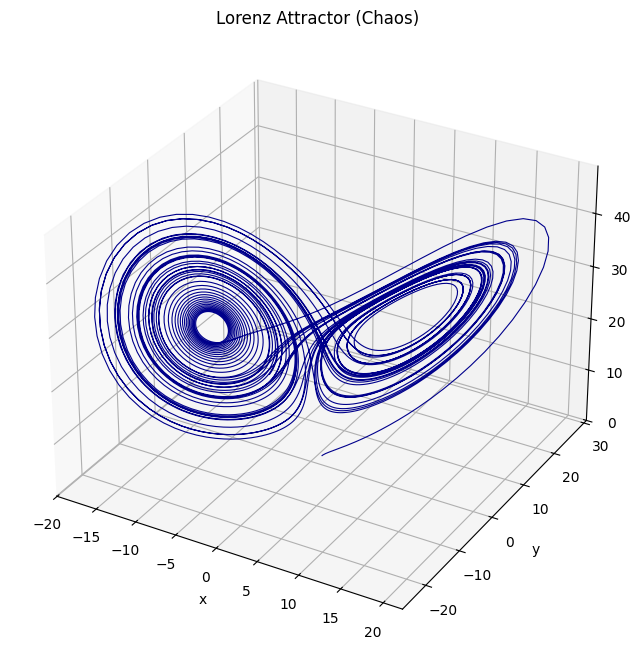

In [ ]:
import matplotlib.pyplot as plt

# --- 1. Generic RK4 Solver (Vectorized) ---
def rk4_solve_system(f, y0, t0, tf, h):
    """
    General RK4 solver for a system of ODEs.
    y0: Initial state vector (can be 1D, 2D, 3D, etc.)
    """
    t_points = np.arange(t0, tf + h, h)
    n_steps = len(t_points)
    
    # y_points will be an array of shape (n_steps, number_of_variables)
    y_points = np.zeros((n_steps, len(y0)))
    y_points[0] = y0
    
    y = np.array(y0)
    
    for i in range(n_steps - 1):
        t = t_points[i]
        
        # Calculate slopes (k1, k2, k3, k4 will be vectors)
        k1 = h * f(t, y)
        k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
        k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
        k4 = h * f(t + h, y + k3)
        
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6.0
        y_points[i+1] = y
        
    return t_points, y_points

# --- 2. Define the Lorenz Equations ---
def lorenz_deriv(t, state):
    """
    Computes the derivatives for the Lorenz system.
    state: array [x, y, z]
    Returns: array [x', y', z']
    """
    x, y, z = state
    
    # Parameters given in the slide
    sigma = 10.0
    rho   = 28.0
    beta  = 8.0 / 3.0
    
    # Equations from the slide
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    
    return np.array([dxdt, dydt, dzdt])

# --- 3. Setup and Solve ---
# Initial conditions: (x, y, z) = (1, 1, 1)
y0 = [1.0, 1.0, 1.0]

# Time settings: Integrate up to t=50
t0 = 0
tf = 50
h  = 0.01  # Step size (needs to be small for chaotic systems)

# Run the solver
t_points, solution = rk4_solve_system(lorenz_deriv, y0, t0, tf, h)

# Extract x, y, z for plotting
x_vals = solution[:, 0]
y_vals = solution[:, 1]
z_vals = solution[:, 2]

# --- 4. Plot in 3D ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

ax.plot(x_vals, y_vals, z_vals, lw=0.8, color='darkblue')

ax.set_title("Lorenz Attractor (Chaos)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Show the plot
plt.show()